In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv
/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv


# UAE Real Estate and Rental Market Data

#### This dataset was retrieved from Kaggle, but was initially gathered from bayut.com, one of Dubai's leading property portals and real estate companies. It encompasses various key attributes such as rent, number of bedrooms and bathrooms, property size and location, across the United Arab Emirates' major cities of Dubai, Abu Dhabi, Sharjah, Ajman, Ras Al Khaimah, Umm Al Quwain and Al Ain. The dataset contains 73742 rows, and 17 columns, covers listings in 2024, and is valuable for comprehensive analysis of trends, pricing, and dynamics of the UAE real estate market.

## Installing libraries and cleaning data

In [2]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv')
df_real = df
df_real

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


In [5]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


### The data contents are checked, as well as any missing values

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

### The only missing values are in the "Latitide" and "Longitude" columns, and accounts for less than 1% of the total data for those columns, however, due to the lack of importance of these columns, they will be dropped 

In [7]:
df_real.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df_real= df_real.drop(['Longitude','Latitude'],axis=1)

In [9]:
df_real.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City'],
      dtype='object')

In [10]:
df_real.describe(include=['object'])

,Address,Type,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Location,City
count,73742,73742,73742,73742,73742,73742,73742,73742,73742
unique,4515,9,3,1,2,1,544,441,8
top,"Khalifa City, Abu Dhabi",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-04-03,Al Reem Island,Dubai
freq,2300,56534,25088,73742,58062,73742,1781,3668,34250


### As shown below, the majority of the data is either an "object" or "int64", but in order to improve analysis and visualisation further in the project, some data types will be converted

In [11]:
df_real.dtypes

Address                    object
Rent                        int64
Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Frequency                  object
Furnishing                 object
Purpose                    object
Posted_date                object
Age_of_listing_in_days      int64
Location                   object
City                       object
dtype: object

In [12]:
df_real['Address']=df_real['Address'].astype('category')
df_real['Posted_date']=pd.to_datetime(df_real['Posted_date'])

In [13]:
df_real.dtypes

Address                         category
Rent                               int64
Beds                               int64
Baths                              int64
Type                              object
Area_in_sqft                       int64
Rent_per_sqft                    float64
Rent_category                     object
Frequency                         object
Furnishing                        object
Purpose                           object
Posted_date               datetime64[ns]
Age_of_listing_in_days             int64
Location                          object
City                              object
dtype: object

In [14]:
df_real.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742,73742.000000
mean,1.479250e+05,2.162811,2.650213,2054.053552,88.057754,2024-02-06 17:43:22.337880576,74.261547
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,2018-01-27 00:00:00,11.000000
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,2024-01-17 00:00:00,30.000000
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,2024-02-29 00:00:00,52.000000
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,2024-03-22 00:00:00,95.000000
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2024-04-10 00:00:00,2276.000000
std,3.069658e+05,1.578155,1.632997,3003.919252,66.534400,NaN,72.346767


### After checking the values in the "Frequency" column, it is clear that the Rent column provides the yearly price of rent of the properties, for a more specific analysis, the rent will also be calculated monthly, and a new column will be added

In [15]:
df_real['Frequency'].unique()

array(['Yearly'], dtype=object)

In [16]:
frequency_counts = df_real['Frequency'].value_counts()

In [17]:
yearly_count = frequency_counts['Yearly']
print(f'The value "Yearly" appears {yearly_count} times in the Frequency column.')

The value "Yearly" appears 73742 times in the Frequency column.


### Monthly rent rates are calculated and a new column is created

In [18]:
df_real['Monthly_Rent'] = df_real['Rent'] / 12

In [19]:
df_real.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Monthly_Rent
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,10333.333333
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,11666.666667
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,8250.000000
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,18333.333333
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,29166.666667


In [20]:
df_real.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City',
       'Monthly_Rent'],
      dtype='object')

### Posted_date column is converted to datetime format, and utilised for visualisations

In [21]:
df_real['Month'] = df_real['Posted_date'].dt.strftime('%B')

In [22]:
Monthly_rent = df_real.groupby('Month')['Monthly_Rent'].mean()

In [23]:
Month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [24]:
Monthly_rent = Monthly_rent.reindex(Month_order)

## Average Monthly Rent by month

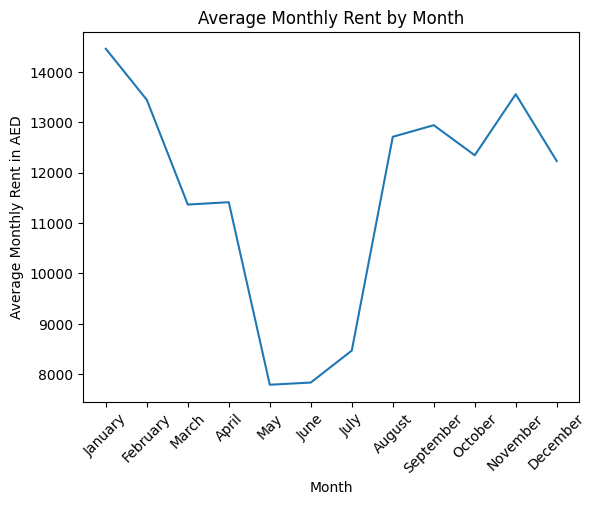

In [25]:
Monthly_rent.plot(kind='line')
plt.xticks(ticks=range(len(Month_order)), labels=Month_order, rotation=45)
plt.title('Average Monthly Rent by Month')
plt.xlabel('Month')
plt.ylabel('Average Monthly Rent in AED')
plt.show()

## Monthly Listing Frequency

In [26]:
df_real['Month'] = df_real['Posted_date'].dt.month

In [27]:
listings_by_month = df_real['Month'].value_counts().sort_index()

In [28]:
listings_by_month = listings_by_month.reset_index()
listings_by_month.columns = ['Month', 'Number of Listings']

In [29]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [30]:
listings_by_month['Month'] = listings_by_month['Month'].map(month_mapping)

In [31]:
print(listings_by_month)

        Month  Number of Listings
0     January                8620
1    February               13977
2       March               27600
3       April                9376
4         May                 209
5        June                 288
6        July                 434
7      August                 657
8   September                1214
9     October                2911
10   November                3675
11   December                4781


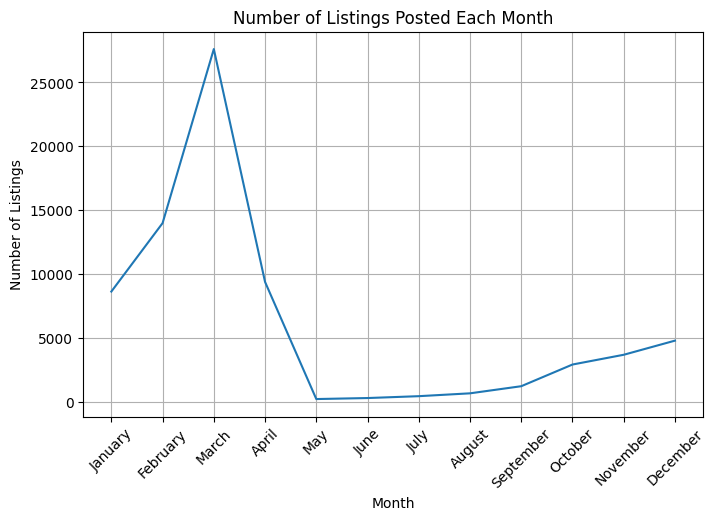

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(listings_by_month['Month'], listings_by_month['Number of Listings'])
plt.title('Number of Listings Posted Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Number of listings by City

In [33]:
listings_by_city = df_real['City'].value_counts().reset_index()
listings_by_city.columns = ['City', 'Number of Listings']

In [34]:
print(listings_by_city)

             City  Number of Listings
0           Dubai               34250
1       Abu Dhabi               23324
2         Sharjah                9516
3           Ajman                4704
4          Al Ain                1040
5  Ras Al Khaimah                 816
6   Umm Al Quwain                  65
7        Fujairah                  27


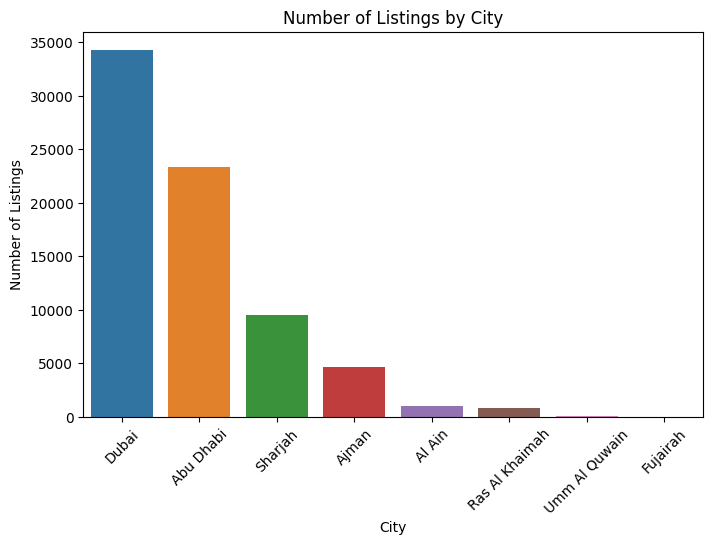

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Number of Listings', data=listings_by_city)
plt.title('Number of Listings by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

## Average Rent by City

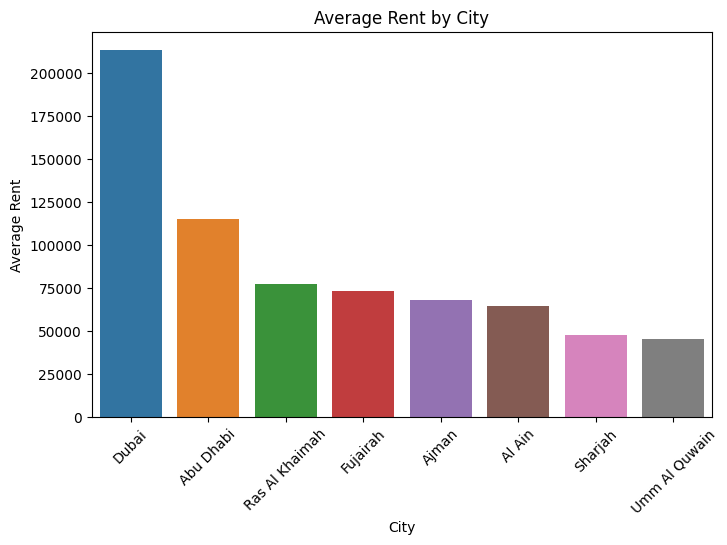

In [36]:
plt.figure(figsize=(8,5))
rent_by_city = df_real.groupby('City')['Rent'].mean().sort_values(ascending=False)
sns.barplot(x=rent_by_city.index, y=rent_by_city.values)
plt.title('Average Rent by City')
plt.xlabel('City')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.show()


## Rent prices by Location

In [37]:
top_locations = df_real.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = df_real[df_real['Location'].isin(top_locations)]

In [38]:
df_real['Location']

0              Al Reem Island
1                  Yas Island
2               Al Raha Beach
3              Al Reem Island
4                  Yas Island
                 ...         
73737              Al Salamah
73738    Umm Al Quwain Marina
73739      King Faisal Street
73740               Al Maqtaa
73741                 Al Rass
Name: Location, Length: 73742, dtype: object

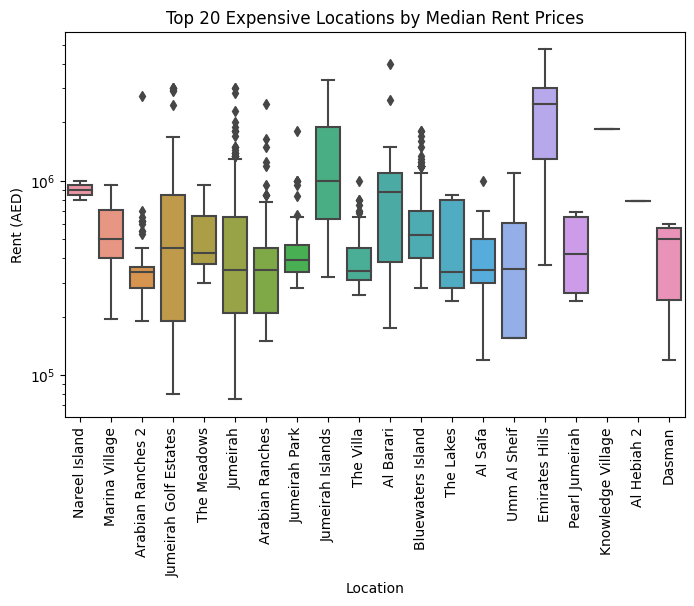

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## Rolling Average

In [41]:
monthly_data = df_real.groupby('Month').agg({'Rent': 'mean', 'Rent_per_sqft': 'mean'}).reset_index()

In [42]:
monthly_data['Rent_rolling_avg'] = monthly_data['Rent'].rolling(window=3).mean()
monthly_data['Rent_per_sqft_rolling_avg'] = monthly_data['Rent_per_sqft'].rolling(window=3).mean()

In [44]:
print(monthly_data[['Month', 'Rent', 'Rent_rolling_avg', 'Rent_per_sqft', 'Rent_per_sqft_rolling_avg']])

    Month           Rent  Rent_rolling_avg  Rent_per_sqft  \
0       1  173487.974362               NaN      91.592852   
1       2  161313.309008               NaN      93.532071   
2       3  136382.730145     157061.337838      86.507088   
3       4  136940.729735     144878.922963      90.543942   
4       5   93469.741627     122264.400502      58.956838   
5       6   93999.947917     108136.806426      59.141955   
6       7  101602.993088      96357.560877      58.137374   
7       8  152511.926941     116038.289315      74.117605   
8       9  155287.345964     136467.421997      83.087207   
9      10  148118.911027     151972.727977      82.152961   
10     11  162668.697959     155358.318317      87.975427   
11     12  146751.669316     152513.092767      82.322643   

    Rent_per_sqft_rolling_avg  
0                         NaN  
1                         NaN  
2                   90.544004  
3                   90.194367  
4                   78.669289  
5             

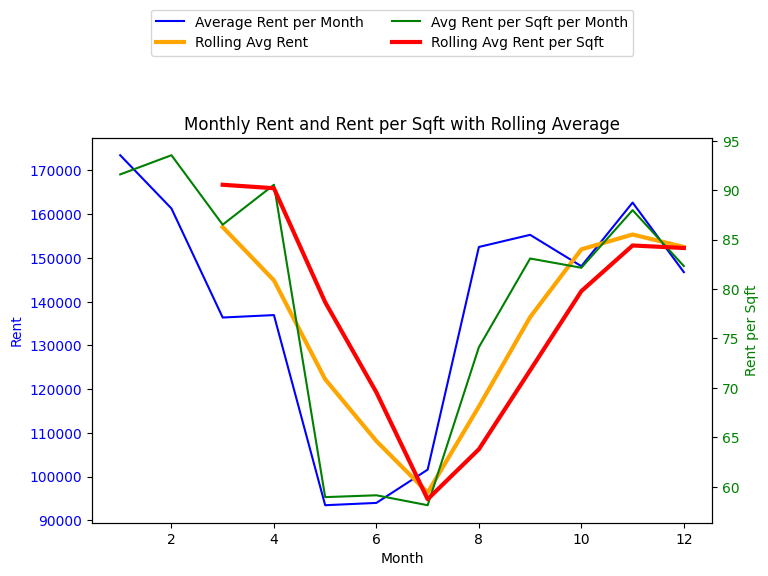

In [48]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(monthly_data['Month'], monthly_data['Rent'], label='Average Rent per Month', color='blue')
ax1.plot(monthly_data['Month'], monthly_data['Rent_rolling_avg'], label='Rolling Avg Rent', color='orange', linewidth=3)
ax1.set_xlabel('Month')
ax1.set_ylabel('Rent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.plot(monthly_data['Month'], monthly_data['Rent_per_sqft'], label='Avg Rent per Sqft per Month', color='green')
ax2.plot(monthly_data['Month'], monthly_data['Rent_per_sqft_rolling_avg'], label='Rolling Avg Rent per Sqft', color='red', linewidth=3)
ax2.set_ylabel('Rent per Sqft', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.title('Monthly Rent and Rent per Sqft with Rolling Average')

plt.show()

## Summary Insights
### A brief summary and analysis of each visualisation is provided as follows:

### Line Graph 1: Average Monthly Rent by Month
The average monthly rent declines significantly from January to June, reaching a low in the summer season, before rising steadily from the end of summer through December.
The dip in rent during mid-year aligns with the low in the number of listings, suggesting a seasonal impact on the rental market. The recovery in rent during the latter part of the year may reflect higher demand or a rebound after the mid-year slump. From this, renters are suggested to target the market mid-year for potentially lower rental prices, while landlords should be prepared for lower rents during this period and possibly adjust their pricing strategy accordingly. As well as this, landlords should be aware of the seasonal fluctuations and when aiming to maximise profits, post their properties on the market around August to December, or the late Spring spike in April.

### Line Graph 2: Number of Listings posted each month
There is a significant spike in listings around April, with listings sharply decreasing after May. The lowest point occurs around June and July, followed by a slow increase toward the end of the year. This further backs our findings of the seasonality of the real estate market in the UAE, as high rental demand is evident in the "off-season". Landlords and estate agencies should focus on the April-May period when listings and perhaps demand are at their highest.

### Bar Chart 1: Number of Listings by City
Dubai has the highest number of listings, as it expectedly dominates the rental market out of the major UAE cities, followed by Abu Dhabi and Sharjah. Other cities like Ajman and Al Ain have significantly fewer listings. The lower number of listings in other cities suggests that rental activity is much more concentrated in Dubai and Abu Dhabi. Investors looking for higher rental activity should focus on Dubai and Abu Dhabi, while those looking for less competitive markets might consider the smaller cities.

### Bar Chart 2: Average Rent by City
Dubai has the highest average rent by a large margin, followed by Abu Dhabi. The economic status and desirability of these cities is reflected in the rent prices, with other cities like Ras Al Khaimah, Fujairah, and Ajman having significantly lower average rents. Investors looking for premium rental properties should focus on Dubai and Abu Dhabi, where rents are substantially higher. Those seeking more affordable investment opportunities might explore cities like Ras Al Khaimah, Ajman, or Sharjah, but may face the issue of lower rental demand.


### Histogram: Top 20 Most Expensive Locations by Median Rent Prices
This box plot shows a range of rent prices across the top 20 expensive locations in the UAE. Locations like Nareel Island and Marina Village appear to have the highest median rents, while areas like Arabian Ranches 2 and The Villa have wider spreads in rent prices. The variation in rent prices between different neighborhoods reflects the diverse market in the UAE, where premium locations (like Nareel Island) maintain consistently high prices, whereas other areas have a broader range, indicating variability in property types and sizes.
Investors looking for high-end, stable rental returns might consider focusing on areas like Nareel Island or Marina Village. For those looking for diverse options or different price points, areas like Arabian Ranches and The Meadows offer more flexibility. Renters that wish to take advantage of lower prices should focus on Arabian Ranches 2, The Villa, and Al Barari.

### Line Graph 3: Monthly Rent and Rent per Sqft with Rolling Average
Both rent and rent per square foot show a clear downward trend in the first half of the year, reaching their lowest points around June. After that, both metrics begin to recover, climbing again in the latter months.
The rolling average provides a smooth representation of the underlying trend, which confirms that the decline is not due to random fluctuation but is part of the broader seasonal trend.
